In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
from warnings import filterwarnings
filterwarnings("ignore")

In [27]:
data = pd.read_excel("./Flight_Price_resources/Data_Train.xlsx")

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [29]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [30]:
data.dropna(inplace=True)

In [31]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [32]:
def change_into_Datetime(col):
    data[col] = pd.to_datetime(data[col])

In [33]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [34]:
for feature in ['Dep_Time', 'Arrival_Time', 'Date_of_Journey']:
    change_into_Datetime(feature)

In [35]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [36]:
data["Journey_day"] = data["Date_of_Journey"].dt.day
data["Journey_month"] = data["Date_of_Journey"].dt.month
data["Journey_year"] = data["Date_of_Journey"].dt.year

In [37]:
def extract_hour_min(df, col):
    df[col + "_hour"] = df[col].dt.hour
    df[col + "_minute"] = df[col].dt.minute
    return df.head(3)

In [38]:
extract_hour_min(data, "Dep_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-08-20 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-08-20 05:50:00,2025-08-20 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-08-20 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25


In [39]:
extract_hour_min(data, "Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-08-20 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-08-20 05:50:00,2025-08-20 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-08-20 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [40]:
cols_to_drop = ["Arrival_Time", "Dep_Time"]
data.drop(cols_to_drop, axis = 1, inplace=True)

In [42]:
def flight_dep_time(x):
    
    if (x>4) and (x<=8):
        return "Early Morning"
    elif (x>8) and (x<=12):
        return "Morning"
    elif (x>12) and (x<=16):
        return "Noon"
    elif (x>16) and (x<=20):
        return "Evening"
    elif (x>20) and (x<=24):
        return "Night"
    else:
        return "late night"

In [43]:
import plotly.express as px

data["Dep_Time_Category"] = data["Dep_Time_hour"].apply(flight_dep_time)

dep_counts = data["Dep_Time_Category"].value_counts().reset_index()
dep_counts.columns = ["Dep_Time_Category", "Count"]

fig = px.bar(dep_counts, 
             x="Dep_Time_Category", 
             y="Count", 
             title="Flights by Departure Time Category")

fig.update_layout(width=600, height=400)
fig.show()


In [44]:
data.drop(columns = "Dep_Time_Category", inplace=True)

In [46]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' + '0m'
    
    return x

In [48]:
data['Duration'] = data['Duration'].apply(preprocess_duration)

In [49]:
data['Duration_hours'] = data['Duration'].apply(lambda x : int(x.split(' ')[0][0: -1]))
data['Duration_mins'] = data['Duration'].apply(lambda x : int(x.split(' ')[1][0: -1]))

In [52]:
data['Duration_total_mins'] = data['Duration_hours']*60 + data['Duration_mins']

In [53]:
data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0,1140
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25,325


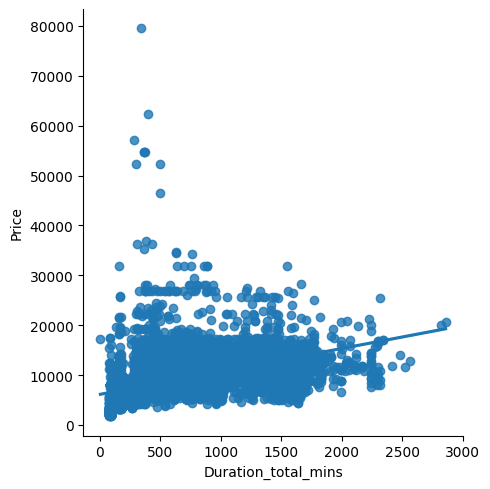

In [57]:
sns.lmplot(x="Duration_total_mins", y="Price", data=data)

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

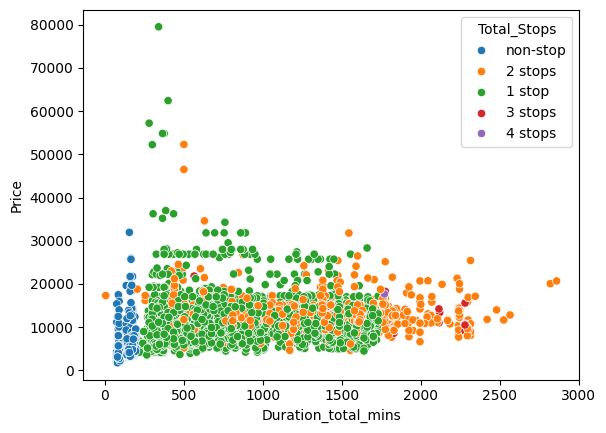

In [56]:
sns.scatterplot(x="Duration_total_mins", y="Price", hue="Total_Stops", data=data)

In [58]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170


In [60]:
data[data["Airline"] == "Jet Airways"].groupby("Route").size().sort_values(ascending=False).head(3)

Route
CCU → BOM → BLR    930
DEL → BOM → COK    875
BLR → BOM → DEL    385
dtype: int64

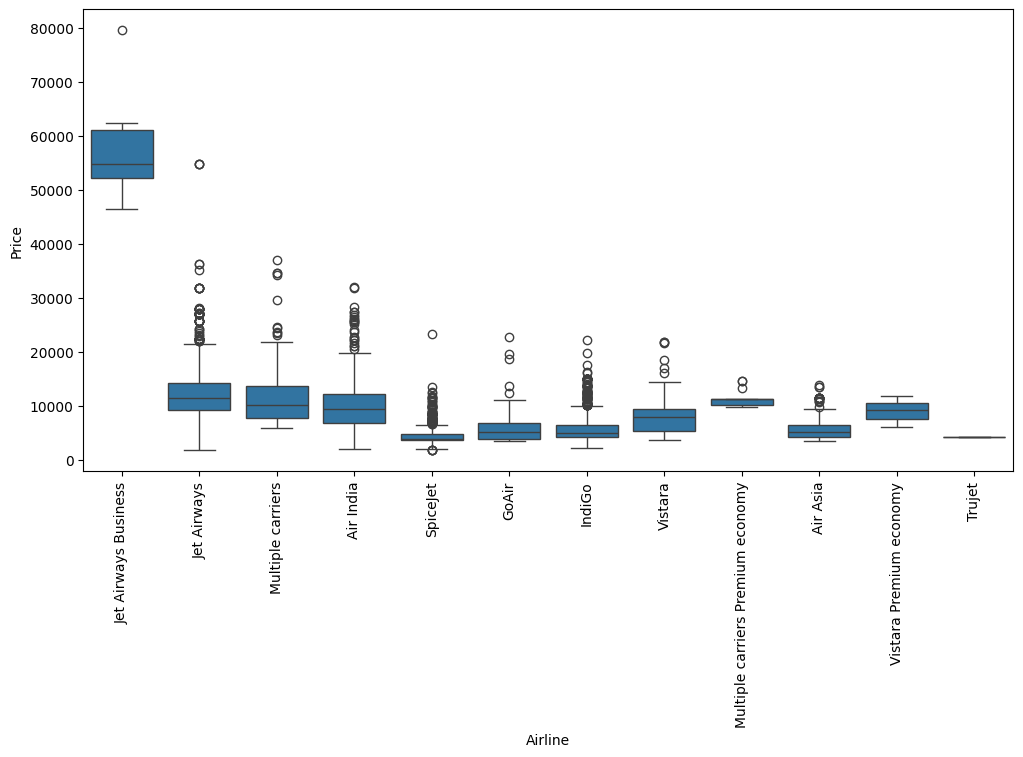

In [66]:
plt.figure(figsize=(12, 6))
sns.boxplot(y="Price", x="Airline", data=data.sort_values('Price', ascending=False)),
plt.xticks(rotation='vertical')
plt.show()

In [67]:
cat_col = [col for col in data.columns if data[col].dtype == 'object']

In [68]:
num_col = [col for col in data.columns if data[col].dtype != 'object']

In [70]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [73]:
for sub_category in data['Source'].unique():
    data['Source_' + sub_category] = data['Source'].apply(lambda x : 1 if x ==sub_category else 0)

In [78]:
data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [80]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [81]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [83]:
dict_airlines = {key:index for index, key in enumerate(airlines, 0)}

In [84]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [85]:
data['Airline'] = data['Airline'].map(dict_airlines)

In [87]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [88]:
data['Destination'].replace('New Delhi', 'Delhi', inplace=True)

In [89]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [90]:
dest = data.groupby('Destination')['Price'].mean().sort_values().index

In [91]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [92]:
dict_dest = {key:index for index, key in enumerate(dest, 0)}

In [94]:
data['Destination'] = data['Destination'].map(dict_dest)

In [96]:
stop = {'non-stop': 0, '2 stops': 2, '1 stop': 1, '3 stops': 3, '4 stops': 4}

In [97]:
data['Total_Stops'] = data['Total_Stops'].map(stop)

In [98]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0


In [99]:
data['Additional_Info'].value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [ ]:
data.drop(columns=["Date_of_Journey", "Additional_Info", "Duration_total_mins", "Source", "Journey_year", "Route", "Duration"], inplace=True)

In [101]:
data.columns

Index(['Airline', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Source_Banglore', 'Source_Kolkata', 'Source_Delhi',
       'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [106]:
data.head(2)

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0


In [115]:
def plot(df, col):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

    sns.distplot(df[col], ax=ax1)
    sns.boxplot(df[col], ax=ax2, orient="h")
    sns.distplot(df[col], ax=ax3, kde=False)

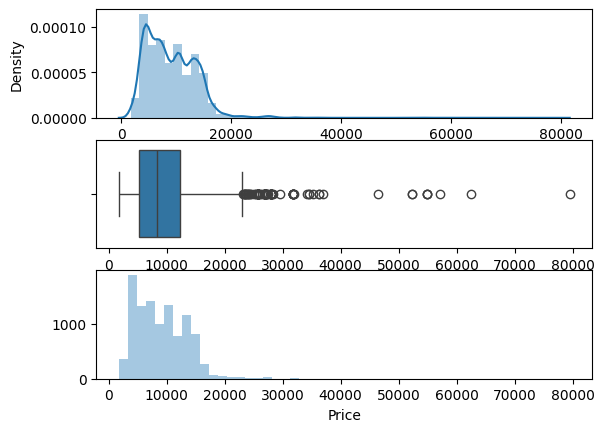

In [ ]:
plot(data, 'Price')

In [117]:
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)
iqr = q3 - q1
maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

In [118]:
print(maximum, minimum)

23017.0 -5367.0


In [121]:
print([price for price in data['Price'] if price>maximum or price<minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [122]:
len([price for price in data['Price'] if price>maximum or price<minimum])

94

In [ ]:
## Using 35k as the threshold value 
data['Price'] = np.where(data['Price'] >= 35000, data['Price'].median(), data['Price'])

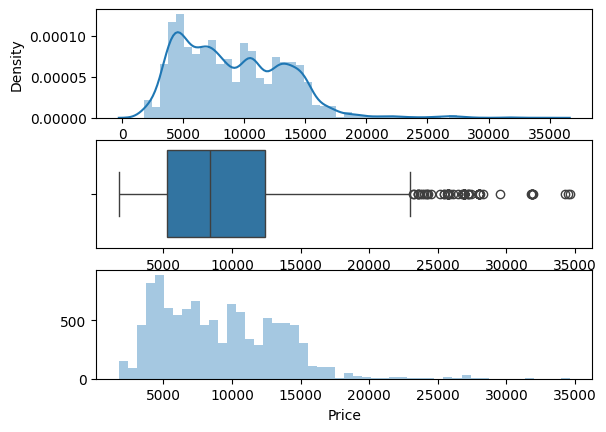

In [125]:
plot(data, 'Price')

In [126]:
X = data.drop(['Price'], axis = 1)

In [127]:
y = data['Price']

In [128]:
from sklearn.feature_selection import mutual_info_regression

In [129]:
imp = mutual_info_regression(X, y)

In [133]:
imp_df = pd.DataFrame(imp, index=X.columns)
imp_df.columns = ['importance']

In [136]:
imp_df.sort_values(by='importance', ascending=False)

,importance
Airline,1.306049
Arrival_Time_hour,1.139069
Duration_hours,1.120500
Destination,1.060806
Dep_Time_hour,0.932576
Arrival_Time_minute,0.900077
Total_Stops,0.796433
Dep_Time_minute,0.764861
Duration_mins,0.674271
Journey_month,0.636701


# Modelling

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [139]:
from sklearn.ensemble import RandomForestRegressor

In [140]:
ml_model = RandomForestRegressor()

In [141]:
ml_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [142]:
y_pred = ml_model.predict(X_test)

In [143]:
y_pred

array([16811.65,  5346.17,  8801.45, ...,  3505.79,  6212.82,  6853.47],
      shape=(2671,))

In [144]:
from sklearn import metrics

In [145]:
metrics.r2_score(y_test, y_pred)

0.811925104523522

In [146]:
import pickle

In [147]:
file = open('rf_random.pkl', 'wb')

In [148]:
pickle.dump(ml_model, file)

In [149]:
model = open('rf_random.pkl', 'rb')

In [150]:
forest = pickle.load(model)

In [151]:
y_pred2 = forest.predict(X_test)

In [152]:
metrics.r2_score(y_test, y_pred2)

0.811925104523522

# Evaluation Matrix

In [155]:
def mape(y_true, y_pred) :
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [156]:
mape(y_test, y_pred)

np.float64(13.168352035566919)

In [159]:
def predict(ml_model):
    model = ml_model.fit(X_train, y_train)
    print('Training score : {}'.format(model.score(X_train, y_train)))
    y_prediction = model.predict(X_test)
    print('predictions are : {}'.format(y_prediction))
    print('/n')
    r2_score = metrics.r2_score(y_test, y_prediction)
    print('r2 score : {}'.format(r2_score))
    print('MAE : {}'.format(metrics.mean_absolute_error(y_test, y_prediction)))
    print('MSE : {}'.format(metrics.mean_squared_error(y_test, y_prediction)))
    print('RMSE : {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_prediction))))
    print('MAPE : {}'.format(mape(y_test, y_prediction)))
    sns.displot(y_test-y_pred)

Training score : 0.95145383404358
predictions are : [16746.74  5460.52  8752.36 ...  3545.73  6122.53  6785.74]
/n
r2 score : 0.8095663779855831
MAE : 1183.300562926289
MSE : 3707285.516214514
RMSE : 1925.4312546062283
MAPE : 13.231115214093563


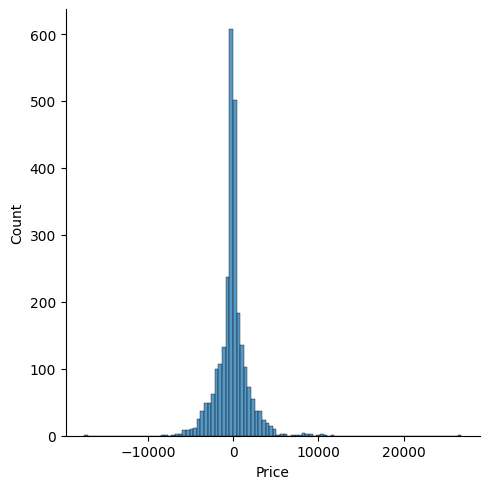

In [160]:
predict(RandomForestRegressor())

In [161]:
from sklearn.tree import DecisionTreeRegressor

Training score : 0.966591628243878
predictions are : [16840.  4959.  8610. ...  3419.  5797.  6442.]
/n
r2 score : 0.6790107882380298
MAE : 1411.4017846000252
MSE : 6248889.471504014
RMSE : 2499.7778844337377
MAPE : 15.613569627958231


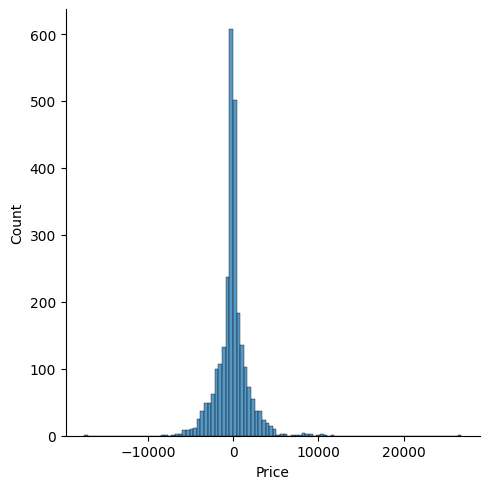

In [163]:
predict(DecisionTreeRegressor())

# Hyptertune Model

In [164]:
from sklearn.model_selection import RandomizedSearchCV

In [165]:
reg_rf = RandomForestRegressor()

In [168]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200 , num = 6)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(start = 5, stop = 30 , num = 4)]

min_samples_split = [5, 10, 15, 100]

In [169]:
random_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split
}


In [170]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [171]:
rf_random = RandomizedSearchCV(estimator=reg_rf, param_distributions=random_grid, cv=3, n_jobs = -1, verbose=2)

In [172]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=21, max_features=auto, min_samples_split=5, n_estimators=980; total time=   0.0s[CV] END max_depth=21, max_features=auto, min_samples_split=5, n_estimators=980; total time=   0.0s

[CV] END max_depth=21, max_features=auto, min_samples_split=5, n_estimators=980; total time=   0.0s
[CV] END max_depth=21, max_features=sqrt, min_samples_split=15, n_estimators=320; total time=   5.7s
[CV] END max_depth=13, max_features=sqrt, min_samples_split=5, n_estimators=320; total time=   6.2s
[CV] END max_depth=21, max_features=sqrt, min_samples_split=15, n_estimators=320; total time=   6.3s
[CV] END max_depth=21, max_features=sqrt, min_samples_split=15, n_estimators=320; total time=   6.6s
[CV] END max_depth=21, max_features=sqrt, min_samples_split=10, n_estimators=320; total time=   6.4s
[CV] END max_depth=13, max_features=auto, min_samples_split=15, n_estimators=980; total time=   0.0s
[CV] END max_depth=13, max_feature

,estimator,RandomForestRegressor()
,param_distributions,"{'max_depth': [5, 13, ...], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [5, 10, ...], 'n_estimators': [100, 320, ...]}"
,n_iter,10
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [173]:
rf_random.best_params_

{'n_estimators': 320,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 21}

In [174]:
rf_random.best_score_

np.float64(0.805090533789279)

In [175]:
rf_random.best_estimator_

,n_estimators,320
,criterion,'squared_error'
,max_depth,21
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False
